# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Reading the dataset

In [2]:
# Load the datasets
athlete_events_df = pd.read_csv('athlete_events.csv')
noc_regions_df = pd.read_csv('noc_regions.csv')

# Initial Exploration

In [3]:
athlete_events_df.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [4]:
athlete_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
athlete_events_df.describe()

ID            Age         Height         Weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168.000000      60.000000   
50%     68205.000000      24.000000     175.000000      70.000000   
75%    102097.250000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                Year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000

In [6]:
noc_regions_df.head()

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

In [7]:
noc_regions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [8]:
noc_regions_df.describe()

NOC   region                 notes
count   230      227                    21
unique  230      206                    21
top     AFG  Germany  Netherlands Antilles
freq      1        4                     1

# Data Cleaning

In [9]:
athlete_events_df.isnull().sum()
noc_regions_df.isnull().sum()
# Handling missing values in athlete_events_df
athlete_events_df = athlete_events_df.dropna(subset=['Age', 'Height', 'Weight'])  # Example action
athlete_events_df

ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
5            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
6            5  Christine Jacoba Aaftink   F  25.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

               Team  NOC        Games  Year  Season            City  \
0             China  CHN  1992 Summer  1992  Summer       Barcelona   
1             China  CHN  2012 Summer  2012  Summer          London   
4       Netherlands  NED  1988 Winter  1988  Winter         Calgary   
5       Netherlands  NED  1988 Winter  1988  Winter         Calgary   
6       Netherlands  NED  1992 Winter  1992  Winter     Albertville   
...             ...  ...          ...   ...     ...             ...   
271111     Poland-1  POL  1976 Winter  1976  Winter       Innsbruck   
271112       Poland  POL  2014 Winter  2014  Winter           Sochi   
271113       Poland  POL  2014 Winter  2014  Winter           Sochi   
271114       Poland  POL  1998 Winter  1998  Winter          Nagano   
271115       Poland  POL  2002 Winter  2002  Winter  Salt Lake City   

                Sport                                     Event Medal  
0          Basketball               Basketball Men's Basketball   NaN  
1                Judo              Judo Men's Extra-Lightweight   NaN  
4       Speed Skating          Speed Skating Women's 500 metres   NaN  
5       Speed Skating        Speed Skating Women's 1,000 metres   NaN  
6       Speed Skating          Speed Skating Women's 500 metres   NaN  
...               ...                                       ...   ...  
271111           Luge                Luge Mixed (Men)'s Doubles   NaN  
271112    Ski Jumping  Ski Jumping Men's Large Hill, Individual   NaN  
271113    Ski Jumping        Ski Jumping Men's Large Hill, Team   NaN  
271114      Bobsleigh                      Bobsleigh Men's Four   NaN  
271115      Bobsleigh                      Bobsleigh Men's Four   NaN  

[206165 rows x 15 columns]

# Merging Datasets

In [10]:
# Merge datasets on 'NOC'
merged_df = pd.merge(athlete_events_df, noc_regions_df, how='left', left_on='NOC', right_on='NOC')

# Data Analysis

In [11]:
#Descriptive Statistics
# Basic statistics about the number of medals
medal_counts = merged_df['Medal'].value_counts()
print(medal_counts)


Gold      10167
Bronze    10148
Silver     9866
Name: Medal, dtype: int64


Data Visualization

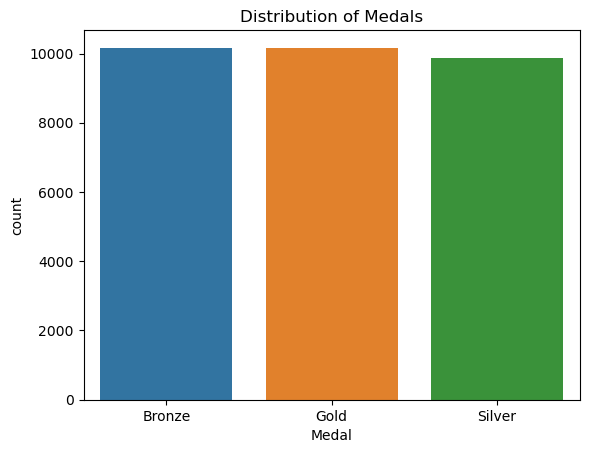

In [12]:
# Plot the distribution of medals
sns.countplot(x='Medal', data=merged_df)
plt.title('Distribution of Medals')
plt.show()



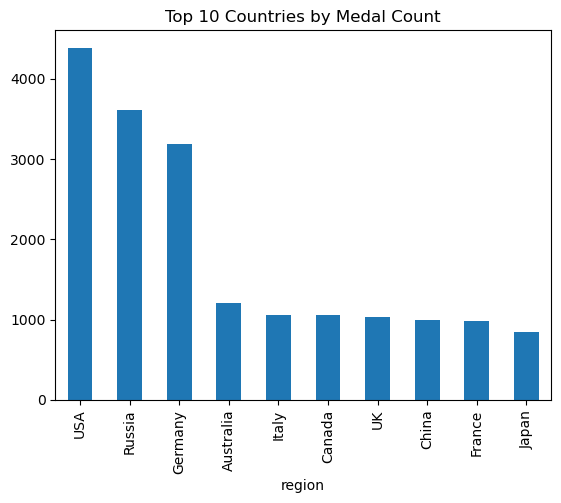

In [13]:
# Plot the number of medals won by different countries
country_medals = merged_df.groupby('region')['Medal'].count().sort_values(ascending=False)
country_medals.head(10).plot(kind='bar')
plt.title('Top 10 Countries by Medal Count')
plt.show()


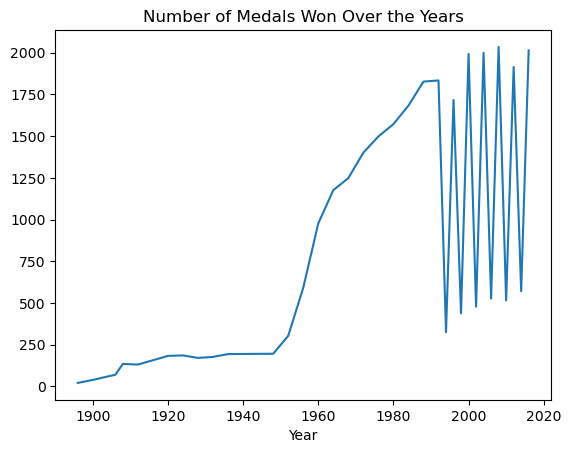

In [14]:

# Plot the number of medals won over the years
yearly_medals = merged_df.groupby('Year')['Medal'].count()
yearly_medals.plot(kind='line')
plt.title('Number of Medals Won Over the Years')
plt.show()


# Advanced Analysis

C:\Users\AB\AppData\Local\Temp\ipykernel_7100\2842652225.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


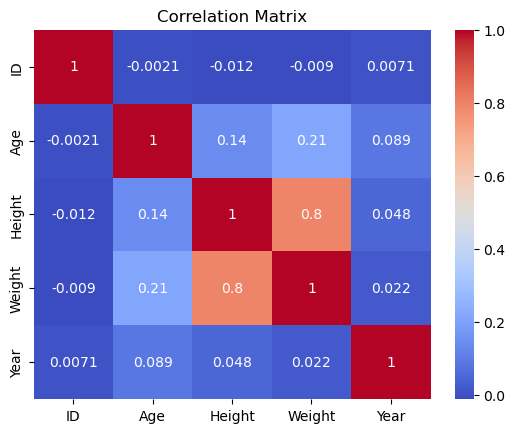

In [15]:
#Correlation Analysis
# Analyzing the correlation between numerical variables
correlation_matrix = merged_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


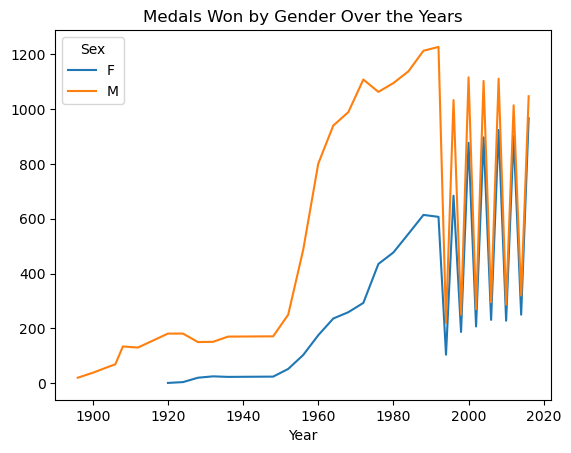

In [16]:
#Identifying Trends and Patterns
# Analyzing trends in medal wins by gender over time
gender_medals = merged_df.groupby(['Year', 'Sex'])['Medal'].count().unstack()
gender_medals.plot(kind='line')
plt.title('Medals Won by Gender Over the Years')
plt.show()


# Exploratory Data Analysis (EDA)

In [17]:
#Interactive Visualizations
import plotly.express as px

# Interactive plot of medal distribution by country
fig = px.bar(country_medals.head(10), title='Top 10 Countries by Medal Count')
fig.show()


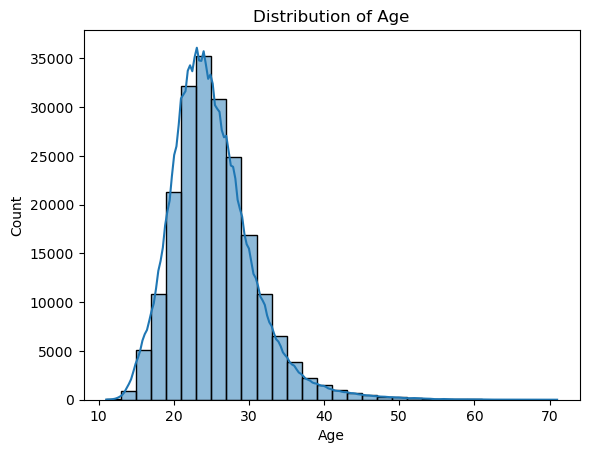

In [18]:
#Analyze the distribution of athletes' physical characteristics.
# Distribution of Age
sns.histplot(merged_df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()


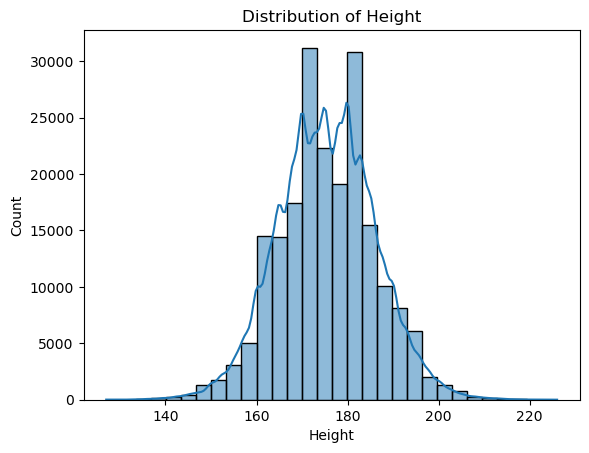

In [19]:

# Distribution of Height
sns.histplot(merged_df['Height'], bins=30, kde=True)
plt.title('Distribution of Height')
plt.show()


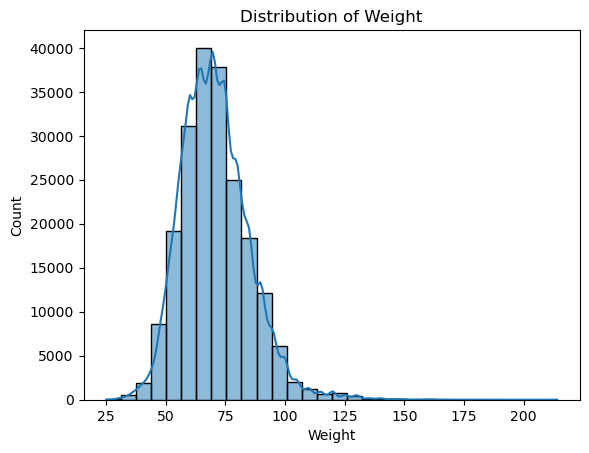

In [20]:

# Distribution of Weight
sns.histplot(merged_df['Weight'], bins=30, kde=True)
plt.title('Distribution of Weight')
plt.show()


# Time Series Analysis

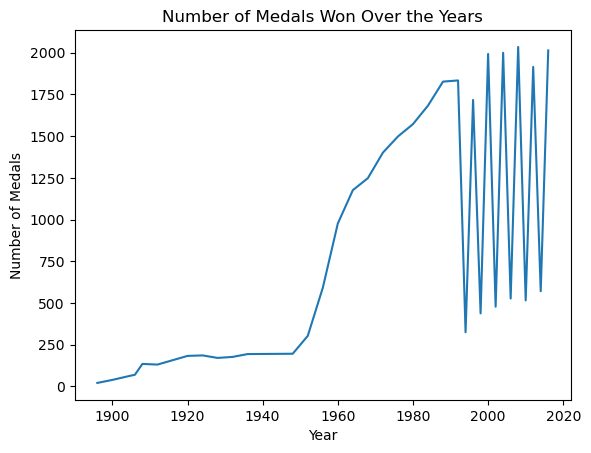

In [21]:
# Time series analysis of medals won over the years
yearly_medals = merged_df.groupby('Year')['Medal'].count()
yearly_medals.plot(kind='line')
plt.title('Number of Medals Won Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.show()


# Geospatial Analysis

C:\Users\AB\AppData\Local\Temp\ipykernel_7100\2207449985.py:4: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



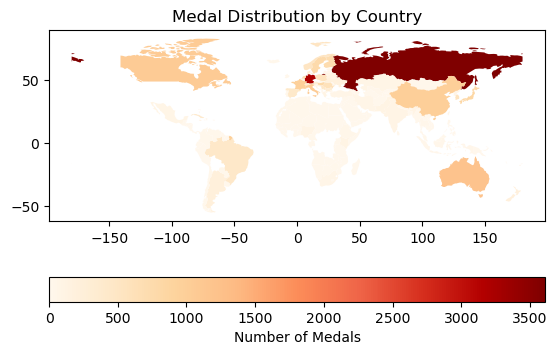

In [22]:
import geopandas as gpd

# Load a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge with the medal data
country_medals = merged_df.groupby('region')['Medal'].count().reset_index()
world_medals = world.merge(country_medals, how='left', left_on='name', right_on='region')

# Plot the world map with medal counts
world_medals.plot(column='Medal', cmap='OrRd', legend=True,
                  legend_kwds={'label': "Number of Medals",
                               'orientation': "horizontal"})
plt.title('Medal Distribution by Country')
plt.show()


# Athlete Performance Analysis

Name
Michael Fred Phelps, II                            28
Larysa Semenivna Latynina (Diriy-)                 18
Nikolay Yefimovich Andrianov                       15
Ole Einar Bjrndalen                                13
Borys Anfiyanovych Shakhlin                        13
Takashi Ono                                        13
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)    12
Sawao Kato                                         12
Natalie Anne Coughlin (-Hall)                      12
Ryan Steven Lochte                                 12
Name: Medal, dtype: int64


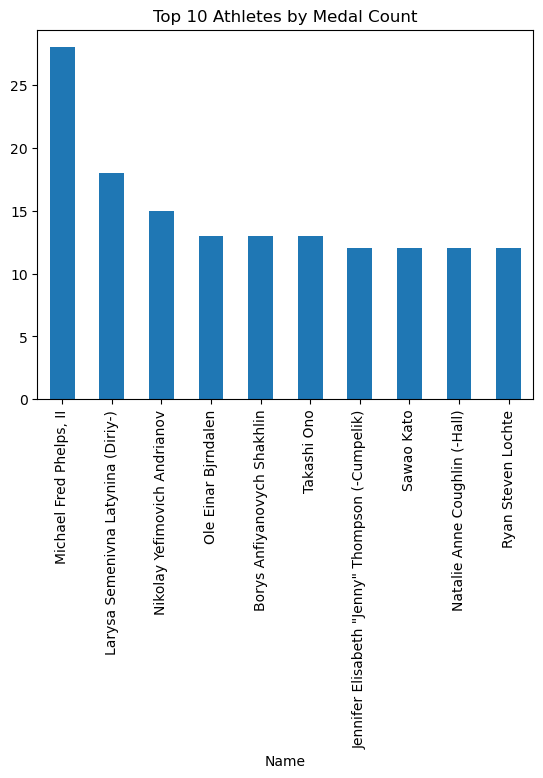

In [23]:
# Top athletes by number of medals won
top_athletes = merged_df[merged_df['Medal'].notnull()].groupby('Name')['Medal'].count().sort_values(ascending=False).head(10)
print(top_athletes)
top_athletes.plot(kind='bar')
plt.title('Top 10 Athletes by Medal Count')
plt.show()


# Sports-Specific Analysis

Sport
Athletics     3648
Swimming      2486
Rowing        2104
Ice Hockey    1301
Hockey        1168
Gymnastics    1161
Fencing       1109
Football      1084
Canoeing      1041
Basketball    1000
Name: Medal, dtype: int64


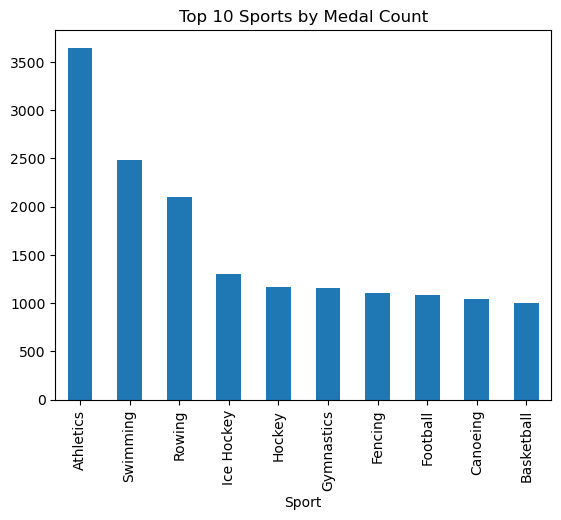

In [24]:
# Medals won in different sports
sports_medals = merged_df.groupby('Sport')['Medal'].count().sort_values(ascending=False).head(10)
print(sports_medals)
sports_medals.plot(kind='bar')
plt.title('Top 10 Sports by Medal Count')
plt.show()


# Gender Analysis

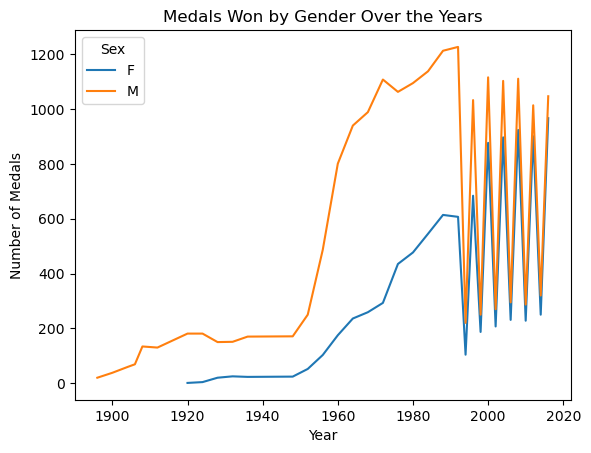

In [25]:
# Number of medals won by gender over the years
gender_medals = merged_df[merged_df['Medal'].notnull()].groupby(['Year', 'Sex'])['Medal'].count().unstack()
gender_medals.plot(kind='line')
plt.title('Medals Won by Gender Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.show()


# Machine Learning

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [27]:
# Prepare data for modeling
features = merged_df[['Age', 'Height', 'Weight']]
features = features.dropna()
target = merged_df['Medal'].notnull().astype(int)  # Binary target: 1 if won a medal, 0 otherwise
target = target[features.index]

In [28]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [29]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Make predictions and evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     52750
           1       0.26      0.06      0.10      9100

    accuracy                           0.84     61850
   macro avg       0.56      0.52      0.50     61850
weighted avg       0.77      0.84      0.79     61850



# Clustering Athletes

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [32]:
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [33]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [34]:
# Add cluster labels to the DataFrame
features['Cluster'] = clusters

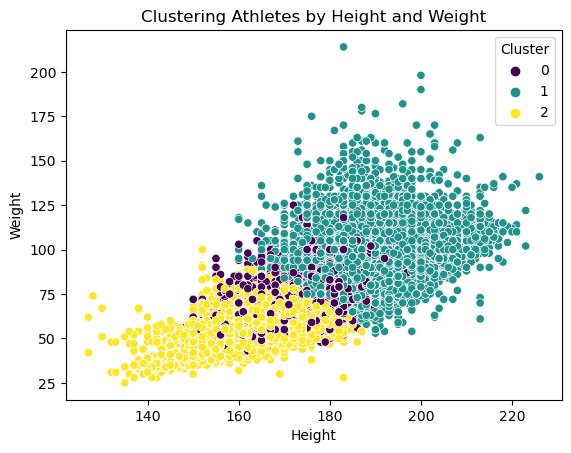

In [35]:
# Visualize the clusters
sns.scatterplot(x='Height', y='Weight', hue='Cluster', data=features, palette='viridis')
plt.title('Clustering Athletes by Height and Weight')
plt.show()

# Feature Engineering

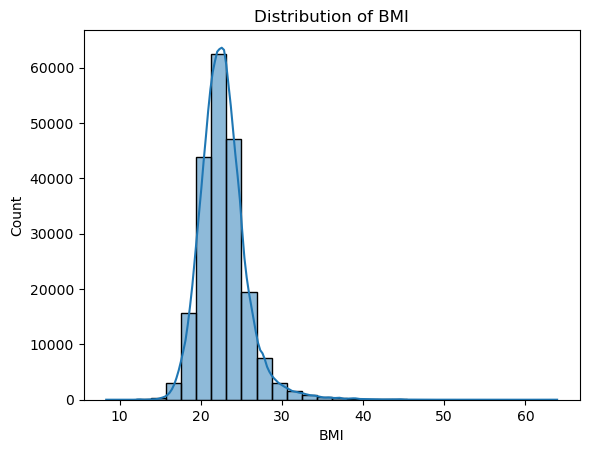

In [36]:
# Calculate BMI
merged_df['BMI'] = merged_df['Weight'] / (merged_df['Height']/100)**2

# Analyze BMI distribution
sns.histplot(merged_df['BMI'].dropna(), bins=30, kde=True)
plt.title('Distribution of BMI')
plt.show()


# Comparative Analysis

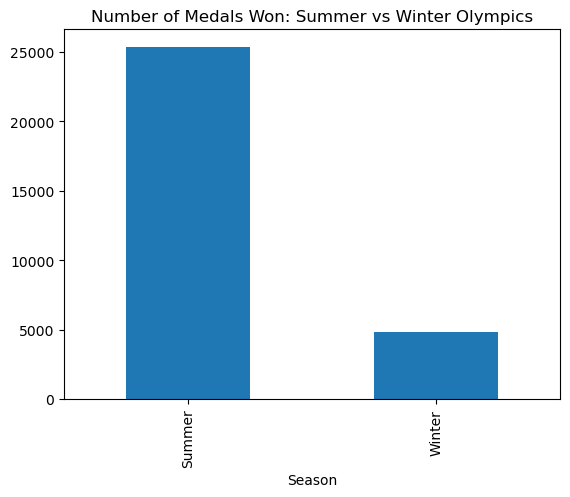

In [37]:
# Compare the number of medals won in Summer vs Winter Olympics
season_medals = merged_df.groupby('Season')['Medal'].count()
season_medals.plot(kind='bar')
plt.title('Number of Medals Won: Summer vs Winter Olympics')
plt.show()


# MACHINE LEARNING ALGORITHMS

Anomaly Detection with Isolation Forest

In [38]:
from sklearn.ensemble import IsolationForest

In [39]:
# Prepare data
features = merged_df[['Age', 'Height', 'Weight']]
features = features.dropna()

In [40]:
# Train Isolation Forest
clf = IsolationForest(random_state=42)
clf.fit(features)

IsolationForest(random_state=42)

In [41]:
# Predict anomalies
anomalies = clf.predict(features)
features['Anomaly'] = anomalies

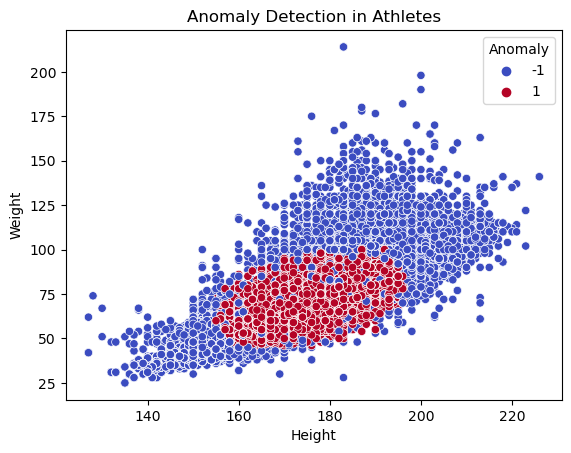

In [42]:
# Visualize anomalies
sns.scatterplot(x='Height', y='Weight', hue='Anomaly', data=features, palette='coolwarm')
plt.title('Anomaly Detection in Athletes')
plt.show()

 Deep Learning with PyTorch

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler


In [44]:
# Prepare data
features = merged_df[['Age', 'Height', 'Weight']]
features = features.dropna()
target = merged_df['Medal'].notnull().astype(int)  # Binary target: 1 if won a medal, 0 otherwise
target = target[features.index]

In [45]:
# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [46]:
# Convert to PyTorch tensors
X = torch.tensor(scaled_features, dtype=torch.float32)
y = torch.tensor(target.values, dtype=torch.float32)

In [47]:
# Define the neural network model
class MedalPredictor(nn.Module):
    def __init__(self):
        super(MedalPredictor, self).__init__()
        self.fc1 = nn.Linear(3, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

In [48]:
# Initialize the model, loss function, and optimizer
model = MedalPredictor()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [49]:
# Train the model
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X).squeeze()
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.6758
Epoch [20/100], Loss: 0.5917
Epoch [30/100], Loss: 0.5170
Epoch [40/100], Loss: 0.4652
Epoch [50/100], Loss: 0.4383
Epoch [60/100], Loss: 0.4281
Epoch [70/100], Loss: 0.4243
Epoch [80/100], Loss: 0.4219
Epoch [90/100], Loss: 0.4201
Epoch [100/100], Loss: 0.4188


In [50]:
# Evaluate the model
model.eval()
with torch.no_grad():
    predictions = model(X).squeeze()
    predicted_classes = (predictions > 0.5).int()
    accuracy = (predicted_classes == y.int()).float().mean()
    print(f'Accuracy: {accuracy.item():.4f}')

Accuracy: 0.8536


Graph-Based Analysis with NetworkX

In [51]:
import networkx as nx

In [52]:
# Create a graph where nodes are athletes and edges are shared events
G = nx.Graph()

In [53]:
# Add nodes for each athlete
athletes = merged_df['Name'].unique()
G.add_nodes_from(athletes)

In [54]:
# Add edges for shared events
for _, event in merged_df.groupby('Event'):
    participants = event['Name'].unique()
    for i in range(len(participants)):
        for j in range(i + 1, len(participants)):
            G.add_edge(participants[i], participants[j])

In [55]:
# Analyze the graph
degree_centrality = nx.degree_centrality(G)
print(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10])

[('Jzsef Kovcs', 0.07246435638540769), ('Vsevolod Mikhaylovich Bobrov', 0.059658024252879395), ('Kim Jong-Min', 0.05246334162057943), ('Jeong Gyeong-Ho', 0.05126591912324319), ('Wolfgang Mller', 0.04955096656349891), ('Kim Il-Nam', 0.0458775178852301), ('Keijo Helmer Kuusela', 0.04514688720888934), ('Mamo Wolde', 0.044964229539804154), ('Gao Lin', 0.044426404180831096), ('Zhu Ting', 0.044426404180831096)]


In [ ]:
# Visualize the graph
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.1)
plt.title('Graph of Athletes Connected by Shared Events')
plt.show()